In [4]:
!python -V

Python 3.8.8


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
!pip install watermark

In [11]:
%load_ext watermark

In [12]:
# OCR 판독 결과만 필요하다면 cv2만 import해도 됨
%watermark --iversions

pandas    : 1.2.4
cv2       : 4.5.5
matplotlib: 3.3.4
json      : 2.0.9
numpy     : 1.20.1



In [14]:
!pip install --upgrade google-api-python-client

In [15]:
!pip install google-cloud-vision

  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0


In [16]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = os.getcwd() + '/i-pills/my_google_api_key.json'

In [19]:
from google.cloud import vision
import io

client = vision.ImageAnnotatorClient()
path = os.getcwd() +'/i-pills/images/test_1.jpg'

with io.open(path, 'rb') as image_file:
  content = image_file.read()

In [24]:
image = vision.Image(content=content)
response = client.text_detection(image=image)
response

text_annotations {
  locale: "und"
  description: "HM\n"
  bounding_poly {
    vertices {
      x: 19
      y: 28
    }
    vertices {
      x: 173
      y: 28
    }
    vertices {
      x: 173
      y: 156
    }
    vertices {
      x: 19
      y: 156
    }
  }
}
text_annotations {
  description: "HM"
  bounding_poly {
    vertices {
      x: 19
      y: 90
    }
    vertices {
      x: 139
      y: 29
    }
    vertices {
      x: 173
      y: 94
    }
    vertices {
      x: 53
      y: 156
    }
  }
}
full_text_annotation {
  pages {
    width: 197
    height: 184
    blocks {
      bounding_box {
        vertices {
          x: 19
          y: 90
        }
        vertices {
          x: 139
          y: 29
        }
        vertices {
          x: 173
          y: 94
        }
        vertices {
          x: 53
          y: 156
        }
      }
      paragraphs {
        bounding_box {
          vertices {
            x: 19
            y: 90
          }
          vertices {
    

In [67]:
# 단어 단위 읽기
texts = response.text_annotations
texts

[locale: "und"
description: "HM\n"
bounding_poly {
  vertices {
    x: 19
    y: 28
  }
  vertices {
    x: 173
    y: 28
  }
  vertices {
    x: 173
    y: 156
  }
  vertices {
    x: 19
    y: 156
  }
}
, description: "HM"
bounding_poly {
  vertices {
    x: 19
    y: 90
  }
  vertices {
    x: 139
    y: 29
  }
  vertices {
    x: 173
    y: 94
  }
  vertices {
    x: 53
    y: 156
  }
}
]

In [68]:
for text in texts:
  print(text.description)

HM

HM


In [69]:
# 글자 단위 읽기
symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
symbols

[bounding_box {
  vertices {
    x: 19
    y: 90
  }
  vertices {
    x: 101
    y: 48
  }
  vertices {
    x: 135
    y: 114
  }
  vertices {
    x: 53
    y: 156
  }
}
text: "H"
, property {
  detected_break {
    type_: LINE_BREAK
  }
}
bounding_box {
  vertices {
    x: 102
    y: 48
  }
  vertices {
    x: 139
    y: 29
  }
  vertices {
    x: 173
    y: 95
  }
  vertices {
    x: 136
    y: 114
  }
}
text: "M"
]

In [64]:
symbols[0].bounding_box

vertices {
  x: 19
  y: 90
}
vertices {
  x: 101
  y: 48
}
vertices {
  x: 135
  y: 114
}
vertices {
  x: 53
  y: 156
}

In [65]:
symbols[0].text

'H'

In [66]:
for symbol in symbols:
    print(symbol.text)

H
M


In [114]:
# 단어 단위, 글자 단위, detect 결과 및 bounding box 출력 함수

def detect_text(path):
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    print('Texts:')
    for text in texts:
       print(text.description)

    vertices1 = (['({},{})'.format(vertex.x, vertex.y) for vertex in text.bounding_poly.vertices])

    print('text_bounds: {}'.format(','.join(vertices1)))
    pts1 = np.array([[vertex.x,vertex.y] for vertex in text.bounding_poly.vertices], np.int32)
    cv2.polylines(img, [pts1], True, (255,0,0), 3)
    
    symbols = response.full_text_annotation.pages[0].blocks[0].paragraphs[0].words[0].symbols
    print('Symbols: ')
    vertices2 = []
    
    for symbol in symbols:
        print(symbol.text)
        vertices2.append(([(vertex.x, vertex.y) for vertex in symbol.bounding_box.vertices]))
    print('symbols_bounds: ',vertices2)
    
    for vertices in vertices2:
        pts2 = np.array([[vertex[0],vertex[1]] for vertex in vertices], np.int32)
        cv2.polylines(img, [pts2], True, (0,0,255), 1)

    plt.figure(figsize=(14,7))
    plt.imshow(img)
    plt.show()

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

Texts:
HM

HM
text_bounds: (19,90),(139,29),(173,94),(53,156)
Symbols: 
H
M
symbols_bounds:  [[(19, 90), (101, 48), (135, 114), (53, 156)], [(102, 48), (139, 29), (173, 95), (136, 114)]]


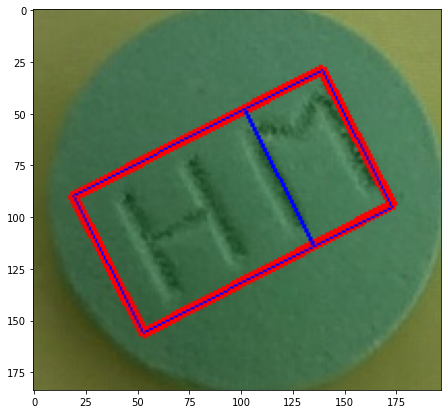

In [108]:
detect_text(path)

Texts:
4양약품
LYAN
호과 소한제
3종회과 소화제
3중
아진팜
INPAM tab OF4, A
상의생의 1회 1정 1일 3회
@일양약품
호정 1일 8회)
중과 소화제
DAM tab
1청 19
PH
RO

4
양
약품
LYAN
호과
소한
제
3
종회과
소화제
3
중
아진
팜
INPAM
tab
OF4,
A
상의
생
의
1
회
1
정
1
일
3
회
@
일양
약품
호정
1
일
8
회
)
중과
소화제
DAM
tab
1
청
19
PH
RO
text_bounds: (1219,295),(1251,381),(1162,414),(1130,328)
Symbols: 
4
symbols_bounds:  [[(1, 408), (100, 361), (153, 472), (54, 519)]]


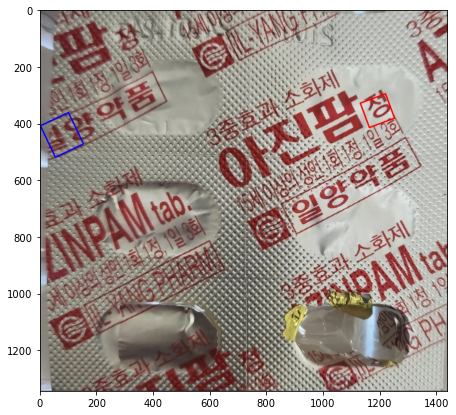

In [111]:
path = os.getcwd() +'/i-pills/images/cover.jpg' 
detect_text(path)

Texts:
F7

F7
text_bounds: (90,82),(110,68),(119,80),(99,94)
Symbols: 
F
7
symbols_bounds:  [[(90, 82), (106, 71), (114, 83), (99, 94)], [(106, 71), (111, 68), (120, 80), (115, 83)]]


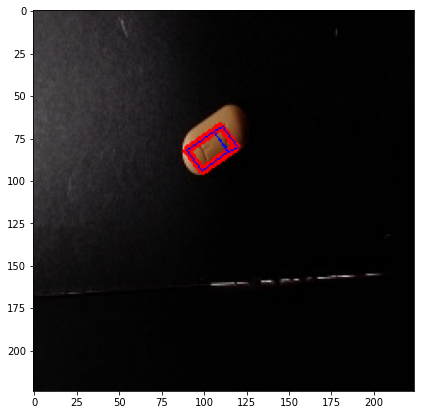

In [116]:
path = os.getcwd() +'/i-pills/images/webcam.jpg' 
detect_text(path)